# Fetch log connection test analysis
Exploratory analysis of the stop times fetching connection tests log data.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [68]:
df = pd.read_csv('fetch_log_test')
#df = pd.read_csv('fetch_log_test_day')
#df.append(pd.read_csv('fetch_log_test_night'))
#df.append(pd.read_csv('fetch_log_test_1_151'))
#df = df.append(pd.read_csv('fetch_log_test'))
#df.append(pd.read_csv('fetch_log_test_1'))
#df.append(pd.read_csv('fetch_log_test_10'))
df['actual_date'] = pd.to_datetime(df['actual_date'])
df = df.set_index('actual_date')
df['resp_length'] = pd.to_numeric(df['resp_length'], errors='coerce')
#df = df[:'2020-02-15 12:00']
#df = df['2020-02-15 15:00':]
df

,cod_stop,resp_time,resp_status,resp_length,timeout,connection_error,max_connections,timeout_time
actual_date,,,,,,,,
2020-02-14 15:01:38.031904,8_20323,3.202729,200,2066.0,False,False,60,60
2020-02-14 15:01:38.029547,8_17651,3.241586,200,3873.0,False,False,60,60
2020-02-14 15:01:38.028607,8_17647,3.296047,200,3879.0,False,False,60,60
2020-02-14 15:01:38.029729,8_17656,3.316247,200,2076.0,False,False,60,60
2020-02-14 15:01:38.028794,8_08783,3.335569,200,10531.0,False,False,60,60
...,...,...,...,...,...,...,...,...
2020-02-14 16:38:19.964573,8_07505,3.803456,200,6034.0,False,False,105,60
2020-02-14 16:38:19.965129,8_17833,3.811718,200,3968.0,False,False,105,60
2020-02-14 16:38:19.955624,8_16793,3.826176,200,6027.0,False,False,105,60


<IPython.core.display.Javascript object>


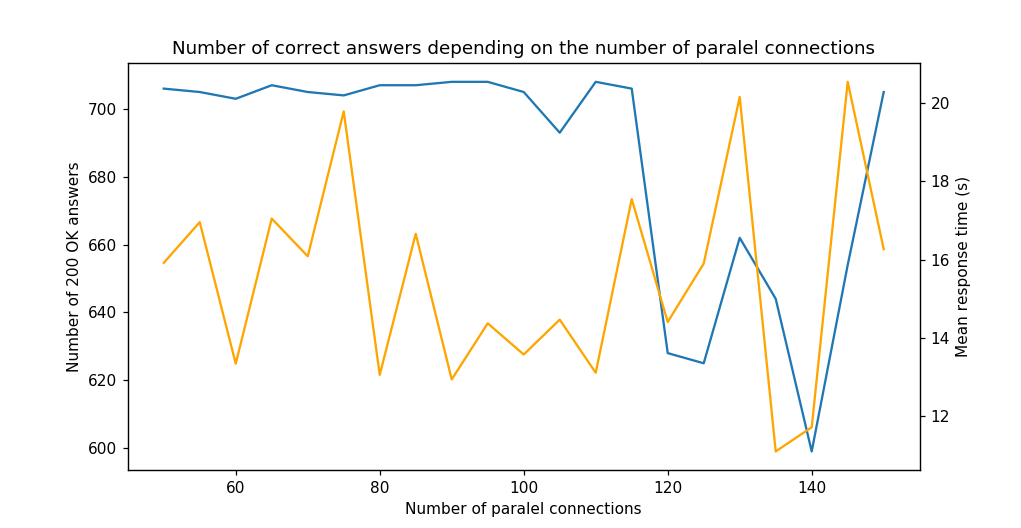

In [69]:
plt.figure()
plt.title('Number of correct answers depending on the number of paralel connections')
plt.xlabel('Number of paralel connections')
plt.ylabel('Number of 200 OK answers')
df_grouped = df.query("resp_status == '200'").groupby('max_connections')
df_grouped_count = df_grouped.size()
df_grouped_size = df.groupby('max_connections').size()
plt.plot(df_grouped_count**2/df_grouped.size(), label='200 OK')
plt.twinx()
plt.ylabel('Mean response time (s)')
plt.plot(df_grouped.mean()['resp_time'], label='mean response time', color='orange')
plt.show()

<IPython.core.display.Javascript object>


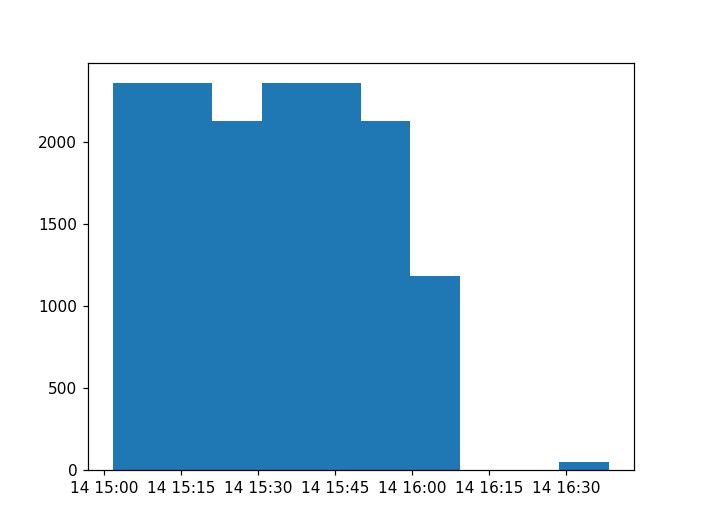

In [70]:
plt.figure()
plt.hist(df.index)
plt.show()